## Task 3: Are we running Shor-t on time?

<font color='red'>Question: You will likely have noticed in Task 2 that Shor's algorithm is not guaranteed to find a solution. In fact, there are few potential points of failure. How
often does your implementation succeed? How does this depend on the size of $N$?</font>



Answer: For our Shor algorithm [implementation](https://github.com/Shinibali/CohortProject_2022/blob/main/Week3_Shor/shor_task2.ipynb), on an average, $20 \%$ of the simulations generated correct factors of the semiprime number $N$ and $80 \%$ of the trials failed. 

We couldn't establish any direct correlation of the size of $N$ (in bits) with that of the chances of failure or success of the algorithm. However, since the last part of the alogrithm involves a classical search for expressing phase values $\phi$ of measured quantum states as continued fractions $s/r$, oftentimes this algorithm fails to generate a correct $r$ if $s=0$ or $gcd(s,r)\neq 1$. Those wrong values of the order $r$ can result in failure of the implementation.

<font color='red'>Question: Use Shor's algorithm to factor a sequence of increasingly large $N$. How large of a number can you reliably factor with your computer?  As you are
increasing $N$, take the opportunity to perform an analysis of: </font>

    -Run time (wall time)
    -Number of qubits required
    -Number of quantum gates required
    
<font color='red'>Present your results graphically and use this to infer the scaling of these resources with the size of the problem instance.</font>

Answer: We could only factor upto $N=91$ using our local machine which took 9 hours of CPU time. Beyond this, we did not have sufficient memory allowance. Following are some analysis on the several semiprime numbers we tried to factorize.

$$
\begin{aligned}
& \text {Semiprime number factorization stats: }\\
&\begin{array}{ccccc}
\hline \hline \text { N } & \text { CPU Time (s) } & \text { Worked? (Y/N)} & \text { No of qubits } & \text{No of quantum gates} \\
\hline 15^{**} & 0.195 & Y & 5 & 18 \\
15  & 193	& Y & 11 & 10344 \\
21  & 941   & N & 13 & 20964 \\
35  & 5227  & Y & 15 & 39412 \\
91  & 31805 & Y & 17 & 74232 \\
\hline
\end{array}
\end{aligned}
$$

** [Smoz et al. (2016)](https://www.science.org/doi/10.1126/science.aad9480) algorithm. All the rest use [Beauregard (2003)](https://dl.acm.org/doi/10.5555/2011517.2011525) algorithm. All simulations used 200 shots in the simulator run on MacBook Pro, Apple M1 chip with 16 GB RAM.

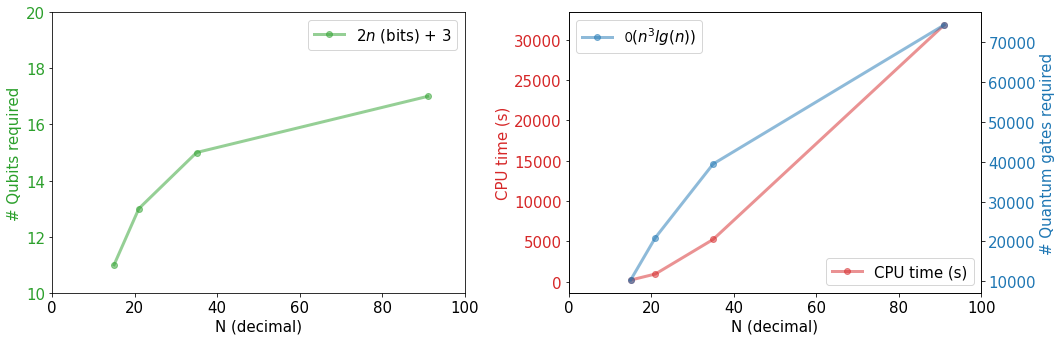

In [120]:
from matplotlib import markers
import numpy as np
import matplotlib.pyplot as plt

# Analyzing data using Beauregard (2003) algorithm
N = [15,21,35,91]                     # semiprime number factorized
cpu_time = [193,941,5227,31805]       # CPU runtime
n_Qgates = [10344,20964,39412,74232]  # number of Quantum gates required
n_Qubits = [11,13,15,17]              # number of Qubits required

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

color = 'tab:red'
ax[1].set_xlabel('N (decimal)')
ax[1].set_ylabel('CPU time (s)', color=color)
ax[1].plot(N, cpu_time, color=color, marker='o', alpha=0.5, linewidth = 3, label='CPU time (s)')
ax[1].tick_params(axis='y', labelcolor=color)
ax[1].legend(loc='lower right')

axt = ax[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
axt.set_ylabel('# Quantum gates required', color=color)  # we already handled the x-label with ax1
axt.plot(N, n_Qgates, color=color, marker='o', alpha=0.5, linewidth = 3, label='$\mathcal{0}(n^3 lg(n))$')
axt.tick_params(axis='y', labelcolor=color)
axt.legend()
ax[1].set_xlim(0, 100)

color = 'tab:green'
ax[0].set_xlabel('N (decimal)')
ax[0].set_ylabel('# Qubits required', color=color)
ax[0].plot(N, n_Qubits, color=color, marker='o', alpha=0.5, linewidth = 3, label='2$n$ (bits) + 3')
ax[0].tick_params(axis='y', labelcolor=color)
ax[0].set_xlim(0, 100)
ax[0].set_ylim(10, 20)
ax[0].legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.rcParams.update({'font.size': 15})
plt.show()


<font color='red'>Question: How does the size of your largest solved instance compare with the size of RSA keys in use today?</font>

Answer: Current day [RSA keys](https://en.wikipedia.org/wiki/RSA_(cryptosystem)) are typically between $2048$ to $4096$ bits long which is ~ $300$ to $400$ times larger than the number $N=91$ we factorized which is only $7$ bits long.

<font color='red'>Question: Can you estimate the quantum resources that would be needed to factor numbers of this size, and when we might have a device capable of doing so? Consider the qubit count and gate count in your estimate. To take things further, you could even estimate a rough wall time by looking at circuit depth, and gate operation speeds of present-day hardware.</font>

Answer: For semiprime numbers that are between $n=[2048,4096]$ bits long, if we implement the [Beauregard (2003)](https://dl.acm.org/doi/10.5555/2011517.2011525) algorithm, $N_{qubits} = [4099, 8195]$ and elementary quantum gates $N_{gates} = [94.5B, 824.6B]$ will be required with circuit depth of $\mathcal{O}(n^3)$.

The $N_{qubits}$ above refer to the number of logical qubits required for the simulations to be executed in a quantum hardware. A conservative estimate for real error-corrected quantum computer is that one can obtain $1$ logical qubit per $1000$ physical qubits. Which puts our requirement to $4-9$ million physical qubits. 
An ambitious estimate for such quantum computers to be ready for use will be between next $5-10$ years, as touted by the lead players in the field: [IBM](https://research.ibm.com/blog/ibm-quantum-roadmap-2025) and [Google](https://quantumai.google/learn/map). 

However, since the required number of quantum gates $N_{gates}$ with our current algorithm turns out to be impractically large, such an algorithm could take upwards of $20,000$ years even on an error-corrected quantum hardware. This renders such algorithm to be unfruitful for breaking current-day RSA keys, until smarter state-of-the-art algorithm with reasonable $N_{gates}$ and circuit depth can be used. 